In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix

ModuleNotFoundError: No module named 'seaborn'

## 1. Problem Definition

## 2. Data Collection
This data is taken from Kaggle. It provides a detailed view of student lifestyle patterns and their correlation with academic performance, represented by GPA.

In [27]:
df = pd.read_csv('../data/student_lifestyle_dataset.csv')

## 3. Data Exploration and Preparation
Let's first start by looking at what the data has

In [28]:
df.columns

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

In [29]:
df.shape

(2000, 8)

In [30]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [31]:
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,3.115960
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.298674
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


- As we can see above `Stress_Level` is categorical. Let's see what the data looks like

In [33]:
df.describe(include="object")

,Stress_Level
count,2000
unique,3
top,High
freq,1029


In [34]:
df.isnull().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

- There are no null values in the data

In [35]:
df.duplicated().sum()

0

- There are no duplicated entries in the data


### Univariate Analysis

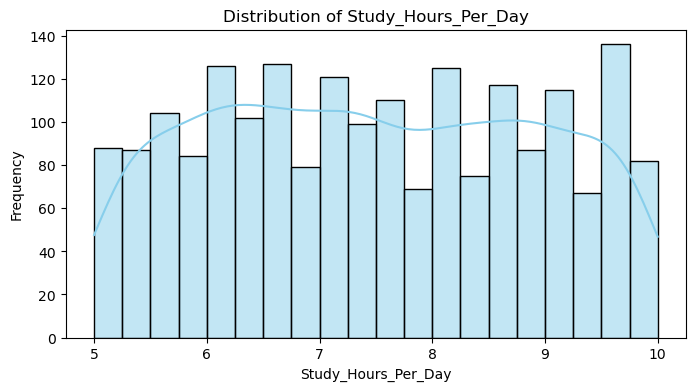

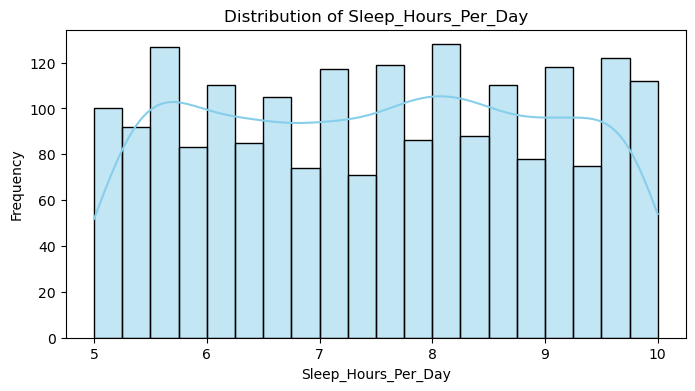

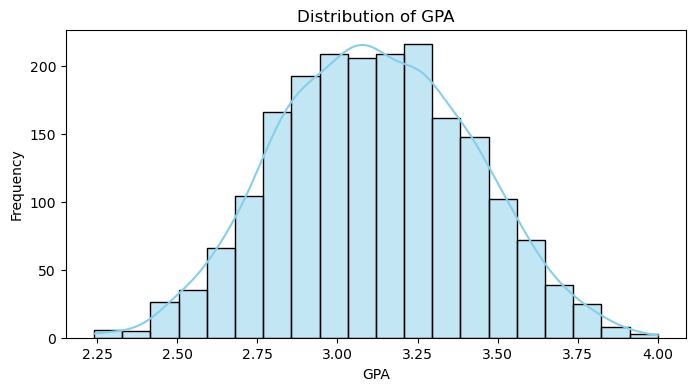

In [36]:
num_cols = ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'GPA']

for col in num_cols:
    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


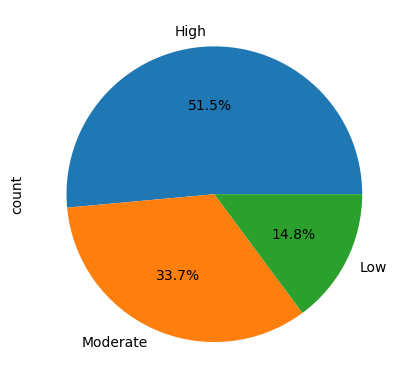

C:\Users\hanna\AppData\Local\Temp\ipykernel_10760\2226810447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel')


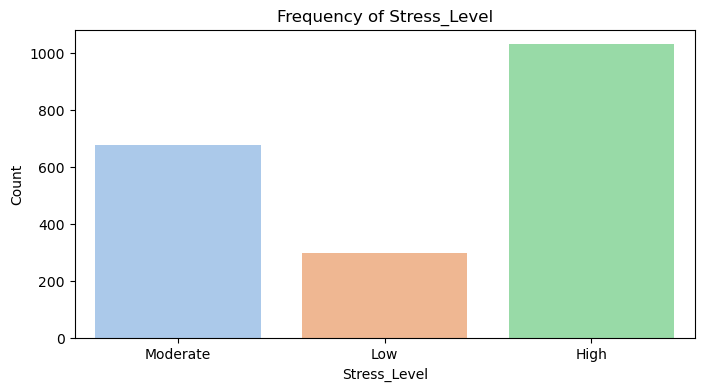

In [37]:

cat_cols = ['Stress_Level'] 
df['Stress_Level'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='pastel')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


- Almost half of the data contains high stress level

### Bivariate Analysis

- Let's see the correlation between `Stress_Level` and `GPA`

Stress_Level
High        3.261973
Low         2.816869
Moderate    3.024837
Name: GPA, dtype: float64


C:\Users\hanna\AppData\Local\Temp\ipykernel_10760\646981424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stress_Level', y='GPA', palette='Set2')


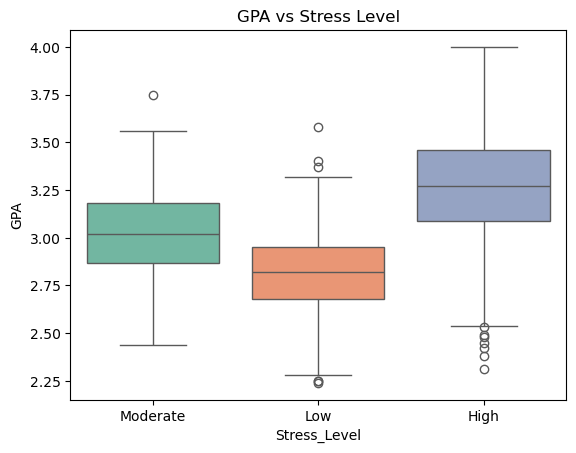

In [38]:
stress_gpa = df.groupby('Stress_Level')['GPA'].mean()
print(stress_gpa)

# Boxplot for GPA vs Stress_Level
sns.boxplot(data=df, x='Stress_Level', y='GPA', palette='Set2')
plt.title('GPA vs Stress Level')
plt.show()

- This plot shows that higher stress levels might be associated with better academic performance (higher GPA).

                     Study_Hours_Per_Day       GPA
Study_Hours_Per_Day             1.000000  0.734468
GPA                             0.734468  1.000000


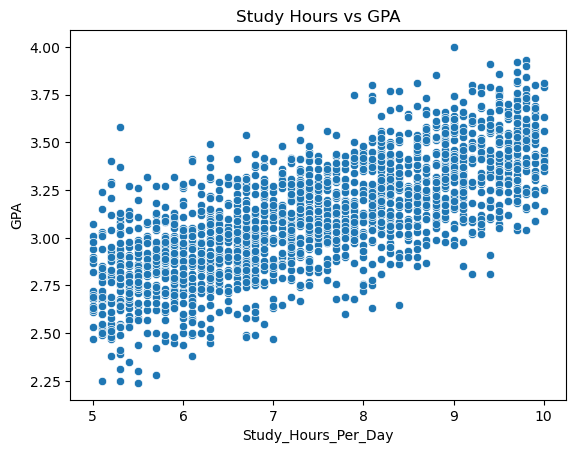

In [39]:
corr = df[['Study_Hours_Per_Day', 'GPA']].corr()
print(corr)

sns.scatterplot(data=df, x='Study_Hours_Per_Day', y='GPA')
plt.title('Study Hours vs GPA')
plt.show()

- The scatter plot shows there's a high correlation between `Study_Hours_Per_Day` and `GPA`

                     Study_Hours_Per_Day  Sleep_Hours_Per_Day
Study_Hours_Per_Day             1.000000             0.026717
Sleep_Hours_Per_Day             0.026717             1.000000


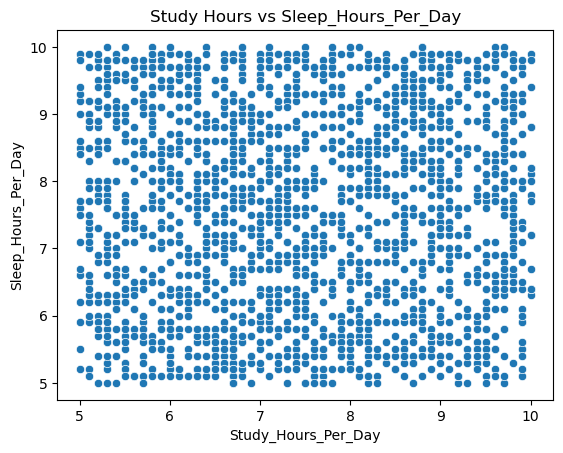

In [40]:
corr = df[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day']].corr()
print(corr)

sns.scatterplot(data=df, x='Study_Hours_Per_Day', y='Sleep_Hours_Per_Day')
plt.title('Study Hours vs Sleep_Hours_Per_Day')
plt.show()


- The data suggests there is no correlation between `Study_Hours_Per_Day` and `Sleep Hours`

### Multivariate Analysis

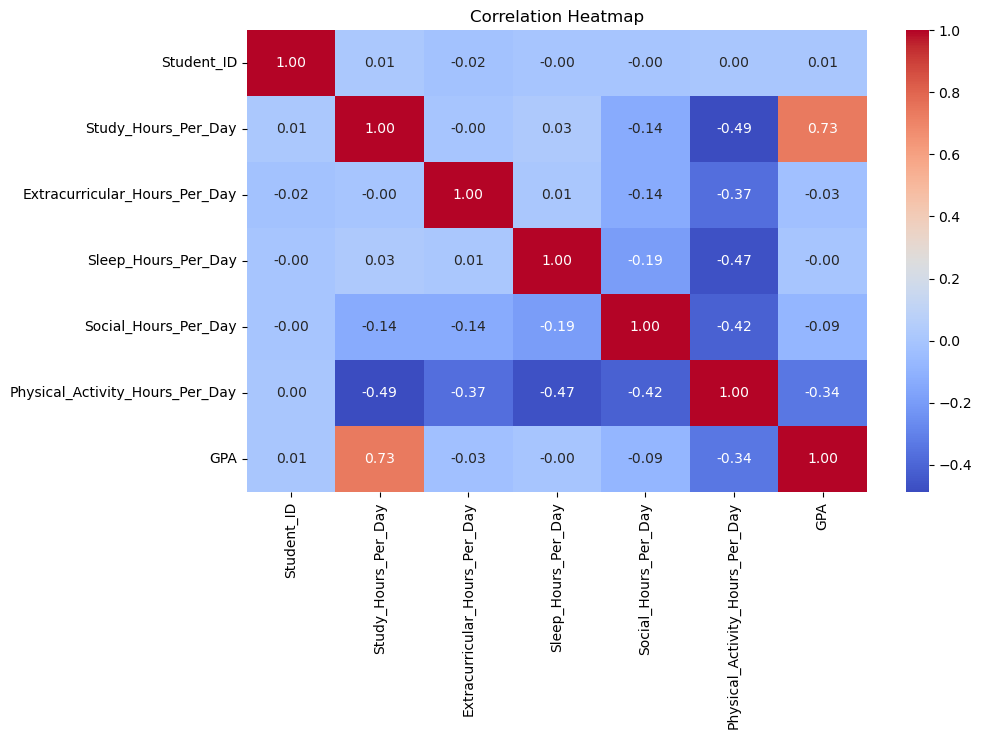

In [41]:
# Correlation matrix
corr_matrix = df.drop(columns=["Stress_Level"]).corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Observations from the above visualization
- There is a strong positive correlation between `GPA` and `Study Hours`
- There is a negative correlation between `Physical activity hours per day` and `Study hours per day`or `Sleep hours per day`

### Data Splitting

- Before we start preprocessing the data we have to split it to avoid data leakage.

In [42]:
df_train,df_test=train_test_split(df,test_size=0.2,random_state=42)

### Feature Engineering
Let's first encode `Stress Level`. We will encode it to a numerical value.

In [43]:
encode_target = {'Low':0, 'Moderate':1, 'High':2}

df_train['Stress_Level'] = df_train['Stress_Level'].map(encode_target)
df_test['Stress_Level'] = df_test['Stress_Level'].map(encode_target)
df_train.head()


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
968,969,9.7,3.7,7.5,1.0,2.1,3.04,2
240,241,6.3,3.2,6.6,2.7,5.2,2.85,1
819,820,6.0,0.2,7.8,3.6,6.4,2.75,1
692,693,7.8,3.4,9.0,0.7,3.1,2.95,1
420,421,8.8,3.2,5.1,5.8,1.1,3.13,2


- Student ID is just a unique identifier and irrelevant so I will drop it

In [44]:
df_train.drop(['Student_ID'], axis=1, inplace=True)
df_test.drop(['Student_ID'], axis=1, inplace=True)

In [45]:
X_train, y_train = df_train.drop(columns=['Stress_Level']), df_train['Stress_Level']
X_test, y_test = df_test.drop(columns=['Stress_Level']), df_test['Stress_Level']


## 4. Algorithm Selection

In [46]:
model_name = []
accuracy = []
precision = []
recall = []
f1 = []
conf_matrix = []

models = [
    GradientBoostingClassifier(random_state=42),
    SVC(random_state=42, probability=True),  
    RandomForestClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42),
    XGBClassifier(random_state=42),
    XGBRFClassifier(random_state=42)
]


## 5. Model Development and Training

In [47]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  

    model_name.append(model.__class__.__name__)


    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred, average='weighted'))
    recall.append(recall_score(y_test, y_pred, average='weighted'))
    f1.append(f1_score(y_test, y_pred, average='weighted'))

    conf_matrix.append(confusion_matrix(y_test, y_pred))


c:\Users\hanna\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## 6. Model Evaluation

In [48]:
models_df = pd.DataFrame({"Model-Name":model_name, "Accuracy": accuracy ,'Precision':precision,'Recall':recall,'F1':f1})
models_df = models_df.astype({"Accuracy": float, "Precision": float,'Recall':float,'F1':float})
models_df

,Model-Name,Accuracy,Precision,Recall,F1
0,GradientBoostingClassifier,1.000,1.000000,1.000,1.000000
1,SVC,0.945,0.945458,0.945,0.944607
2,RandomForestClassifier,1.000,1.000000,1.000,1.000000
3,ExtraTreesClassifier,0.985,0.985236,0.985,0.984962
4,AdaBoostClassifier,1.000,1.000000,1.000,1.000000
5,DecisionTreeClassifier,1.000,1.000000,1.000,1.000000
6,XGBClassifier,1.000,1.000000,1.000,1.000000
7,XGBRFClassifier,1.000,1.000000,1.000,1.000000


- As shown above most of the models were able to achieve `100%` accuracy, precision, recall, and F1 score

- Let's look at the confusion matrix for Gradient Boosting Classifier

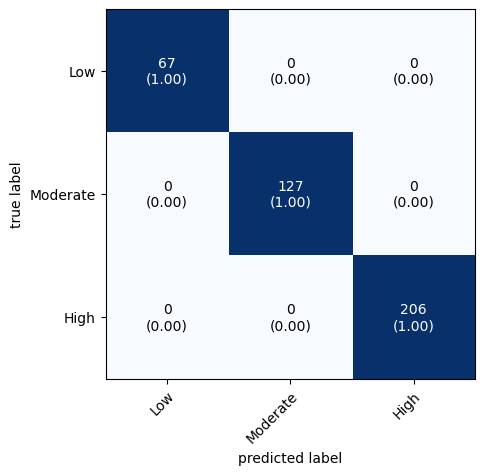

In [49]:
plot_confusion_matrix(conf_mat = conf_matrix[0], 
                      class_names = ['Low', 'Moderate', 'High'],
                      show_normed = True)
plt.show()

- We will use Gradient Boosting Classifier for prediction

In [50]:
joblib.dump(models[0], 'gradientBoostingClassifier.pkl')

['gradientBoostingClassifier.pkl']